In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [187]:
class Perceptron:
    def __init__(self, num_iterations=200, learning_rate=0.01, min_change=1e-6):
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.min_change = min_change
        self.weights = None
        self.bias = None

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias  # 加权求和再加上偏置
        y_predicted = self.activation(linear_output)  # 激活
        return y_predicted

    def activation(self, y):
        return np.where(y >= 0, 1, -1)  # 激活函数

    def train(self, X, y):
        # 初始化权重和偏置
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for step in range(self.num_iterations):
            y_predicted = self.predict(X)

            # 更新权重和偏置
            update = self.learning_rate * (y_predicted - y)
            self.weights -= np.dot(X.T, update)
            self.bias -= np.sum(update)

            if np.linalg.norm(update) < self.min_change:
                break

            if step % 20 == 0:
                accuracy = np.mean(y == y_predicted)
                print(f"Step {step}")
                print(f"Accuracy: {accuracy:.2f}")
                self.visualize(X, y, accuracy, step)

    def visualize(self, X, y, accuracy, step=-1):
        # 画出数据点
        plt.scatter(
            X[y == -1, 0], X[y == -1, 1], marker="o", c="b", label="setosa", s=50
        )
        plt.scatter(
            X[y == 1, 0], X[y == 1, 1], marker="o", c="r", label="versicolor", s=50
        )

        # 画出决策结果
        x0_min, x0_max = np.min(X[:, 0]), np.max(X[:, 0])
        x0 = np.linspace(x0_min, x0_max, 100)
        x1 = (-self.weights[0] * x0 - self.bias) / self.weights[1]
        plt.plot(x0, x1, c="g", linewidth=2)

        # 设置标签
        if step != -1:
            plt.title(
                f"Train Dataset Iteration {step}    Accuracy: {accuracy:.2f}",
                fontweight="bold",
                fontsize=12,
            )
        else:
            plt.title(
                f"Test Dataset   Accuracy: {accuracy:.2f}",
                fontweight="bold",
                fontsize=12,
            )
        plt.xlabel("sepal width (cm)", fontsize=12, fontweight="bold")
        plt.ylabel("petal length (cm)", fontsize=12, fontweight="bold")
        plt.legend(loc="best")

        #! 先保存图片
        if step != -1:
            plt.savefig(f"./images/step_{step}.png")
        else:
            plt.savefig(f"./images/final.png")

        plt.show()

    def test(self, X, y):
        y_predicted = self.predict(X)
        accuracy = np.mean(y == y_predicted)
        self.visualize(X, y, accuracy)

In [188]:
# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 二分类问题，故只取数据集的前两类 
X = X[y != 2, :2]
y = y[y != 2]
# 训练采用的激活函数为符号函数，将标签0转换为-1
y = np.where(y == 0, -1, y)


# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 2) (20, 2)
(80,) (20,)


Step 0
Accuracy: 0.50


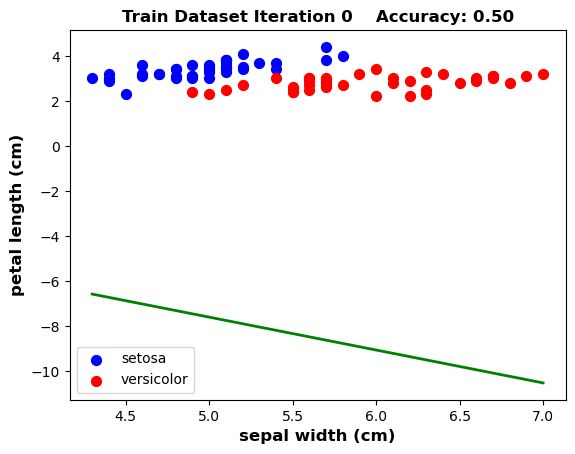

Step 20
Accuracy: 0.50


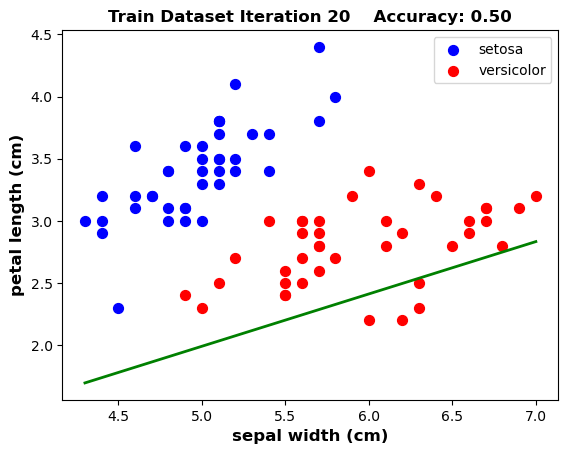

Step 40
Accuracy: 0.50


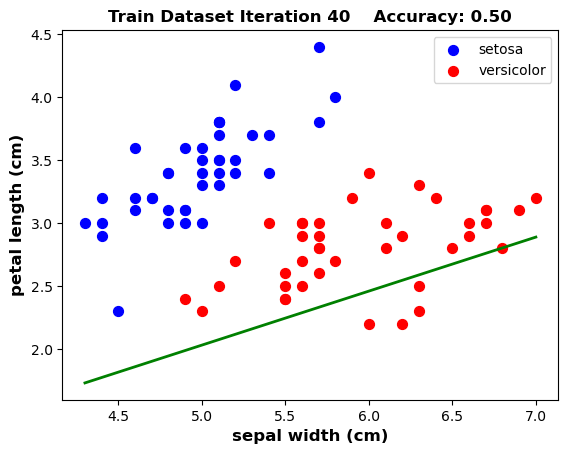

Step 60
Accuracy: 0.97


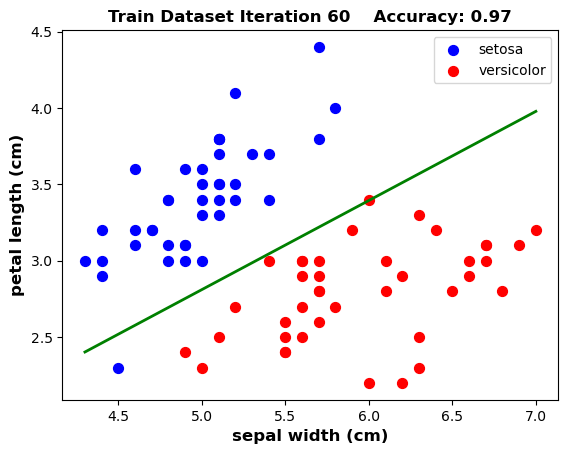

Step 80
Accuracy: 0.97


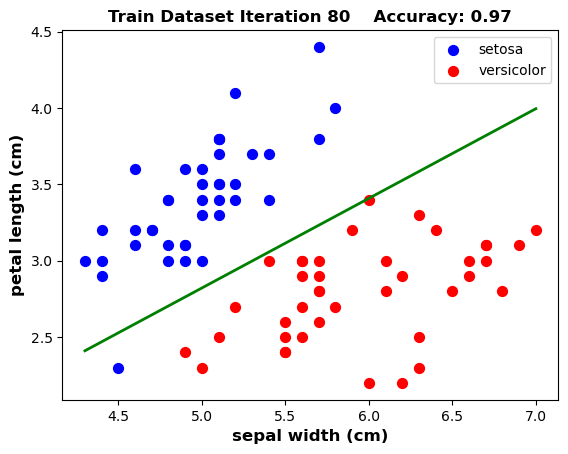

Step 100
Accuracy: 0.99


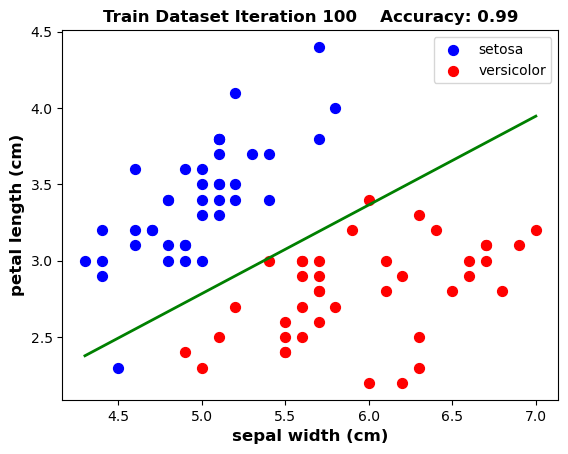

Step 120
Accuracy: 0.97


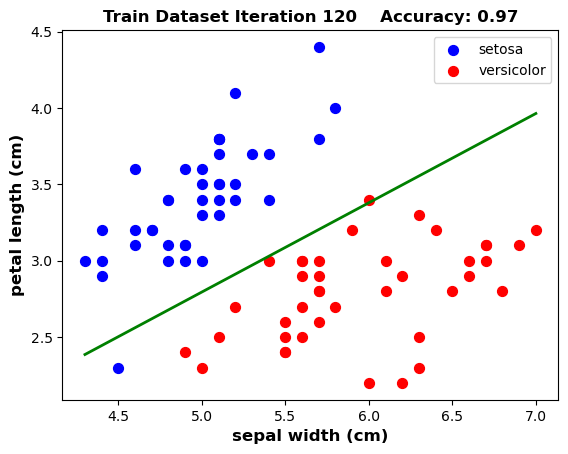

Step 140
Accuracy: 0.97


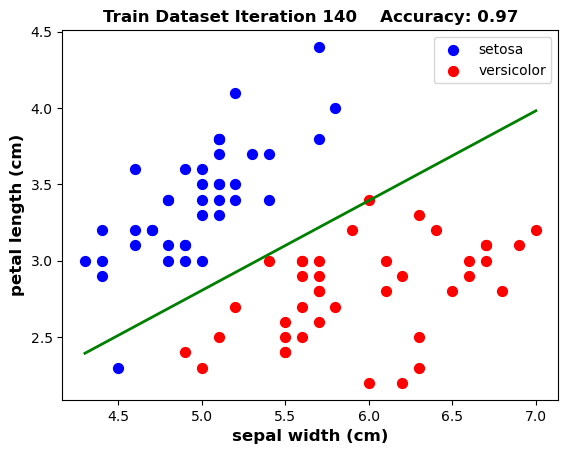

Step 160
Accuracy: 0.97


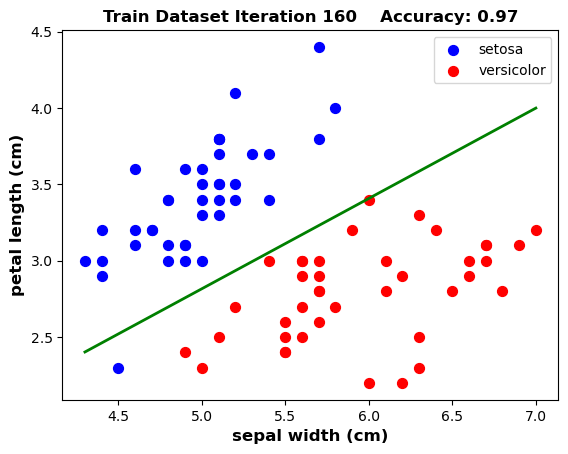

Step 180
Accuracy: 0.99


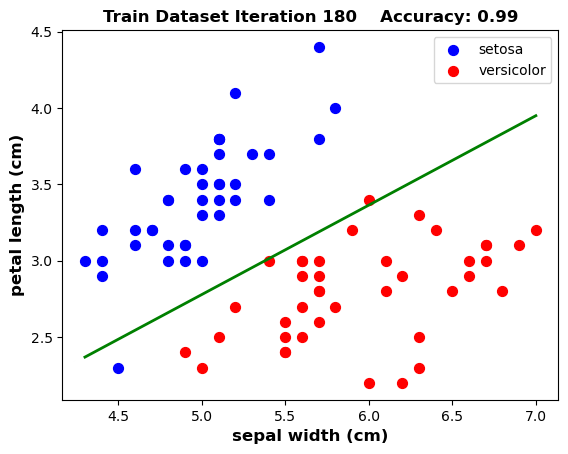

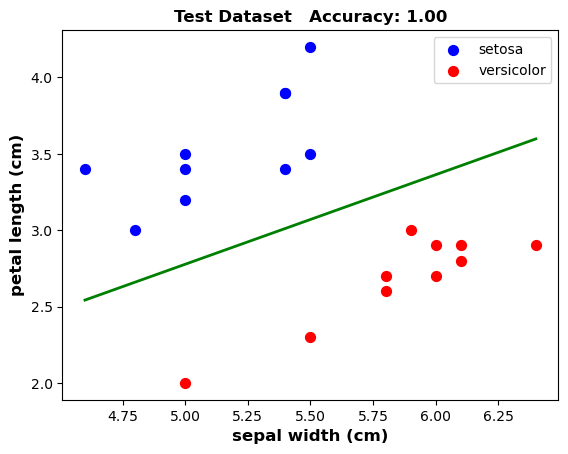

In [189]:
perceptron = Perceptron()
perceptron.train(X_train, y_train)
perceptron.test(X_test, y_test)